<a href="https://colab.research.google.com/github/kashishrathod12/Fifa_Dataset_Analysis/blob/main/Fifa_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

In [89]:
df = pd.read_csv('/content/FIFA17_official_data.csv')

In [90]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
0,176580,L. Suárez,29,https://cdn.sofifa.com/players/176/580/17_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0
1,178518,R. Nainggolan,28,https://cdn.sofifa.com/players/178/518/17_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0
2,181872,A. Vidal,29,https://cdn.sofifa.com/players/181/872/17_60.png,Chile,https://cdn.sofifa.com/flags/cl.png,87,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0
3,197445,D. Alaba,24,https://cdn.sofifa.com/players/197/445/17_60.png,Austria,https://cdn.sofifa.com/flags/at.png,86,89,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0
4,195864,P. Pogba,23,https://cdn.sofifa.com/players/195/864/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,94,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0


In [91]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating
count,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17541.000000,17560.000000,...,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000,17560.000000
mean,205606.310308,24.576310,66.155125,70.938326,1595.468223,1.111902,2.935820,2.305410,20.411265,49.778360,...,55.979954,44.225399,47.460194,45.540888,16.811333,16.536731,16.441856,16.596185,16.887927,65.620615
std,33102.038643,4.653748,7.013210,6.140487,269.862012,0.385032,0.657838,0.746962,17.047842,18.423713,...,13.301553,21.532570,21.785704,21.459058,17.796100,16.953668,16.589324,17.137032,18.034308,6.940057
min,16.000000,15.000000,45.000000,45.000000,751.000000,1.000000,1.000000,1.000000,1.000000,6.000000,...,5.000000,4.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,44.000000
25%,191486.000000,21.000000,62.000000,67.000000,1452.000000,1.000000,3.000000,2.000000,9.000000,38.000000,...,47.000000,22.000000,26.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,61.000000
50%,212936.000000,24.000000,66.000000,71.000000,1633.000000,1.000000,3.000000,2.000000,18.000000,54.000000,...,57.000000,48.000000,54.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,66.000000
75%,229670.000000,28.000000,71.000000,75.000000,1786.000000,1.000000,3.000000,3.000000,27.000000,64.000000,...,66.000000,63.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,70.000000
max,241056.000000,46.000000,94.000000,94.000000,2291.000000,5.000000,5.000000,5.000000,99.000000,91.000000,...,94.000000,92.000000,92.000000,91.000000,89.000000,91.000000,95.000000,91.000000,90.000000,92.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560 entries, 0 to 17559
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17560 non-null  int64  
 1   Name                      17560 non-null  object 
 2   Age                       17560 non-null  int64  
 3   Photo                     17560 non-null  object 
 4   Nationality               17560 non-null  object 
 5   Flag                      17560 non-null  object 
 6   Overall                   17560 non-null  int64  
 7   Potential                 17560 non-null  int64  
 8   Club                      17317 non-null  object 
 9   Club Logo                 17560 non-null  object 
 10  Value                     17560 non-null  object 
 11  Wage                      17560 non-null  object 
 12  Special                   17560 non-null  int64  
 13  Preferred Foot            17560 non-null  object 
 14  Intern

In [93]:
df.shape

(17560, 63)

In [94]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating'],
      dtype='object')

In [95]:
print("Number of missing values in each column:\n",df.isnull().sum())
print("Total missing values:",df.isnull().sum().sum())

Number of missing values in each column:
 ID                     0
Name                   0
Age                    0
Photo                  0
Nationality            0
                      ..
GKKicking              0
GKPositioning          0
GKReflexes             0
Best Position          0
Best Overall Rating    0
Length: 63, dtype: int64
Total missing values: 18565


In [96]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Number of numerical columns: ",len(num_cols))
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
print("Number of Categorical columns: ", len(cat_cols))
for col in cat_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
df.head()

Number of numerical columns:  44
Number of Categorical columns:  19


/tmp/ipython-input-2686945495.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-2686945495.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
0,176580,9646,29,2287,154,153,92,92,210,486,...,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,14,88.0
1,178518,13538,28,2579,13,12,86,86,473,571,...,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,2,84.0
2,181872,1353,29,2832,27,27,87,87,212,471,...,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,2,85.0
3,197445,3132,24,5142,9,6,86,89,212,471,...,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,6,84.0
4,195864,12780,23,5065,53,50,88,94,367,88,...,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,0,85.0


In [97]:
duplicate_count = df.duplicated().sum()
if duplicate_count:
  df = df.drop_duplicates()
  print(f'Dropped {duplicate_count} duplicate rows')
df.shape

(17560, 63)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560 entries, 0 to 17559
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17560 non-null  int64  
 1   Name                      17560 non-null  int64  
 2   Age                       17560 non-null  int64  
 3   Photo                     17560 non-null  int64  
 4   Nationality               17560 non-null  int64  
 5   Flag                      17560 non-null  int64  
 6   Overall                   17560 non-null  int64  
 7   Potential                 17560 non-null  int64  
 8   Club                      17560 non-null  int64  
 9   Club Logo                 17560 non-null  int64  
 10  Value                     17560 non-null  int64  
 11  Wage                      17560 non-null  int64  
 12  Special                   17560 non-null  int64  
 13  Preferred Foot            17560 non-null  int64  
 14  Intern

In [99]:
df = df.drop(['Photo','Flag','Name','Body Type','Club Logo'],axis=1)

In [100]:
df.shape

(17560, 58)

In [101]:
def convet_num(i):
  i= str(i).replace("€","").strip()
  if'M' in i:
    return float(i.replace("M",""))*1_00_000
  elif 'K' in i:
    return float(i.replace("K",""))*1_000
  elif i.isdigit():
    return float(i)
  else:
    return 0.0
df['Value']=df['Value'].apply(convet_num)
df['Wage']=df['Wage'].apply(convet_num)

In [102]:
df["Weight"] = df["Weight"].astype(str).str.replace("lbs","").astype(float)
def convert_height(x):
    try:
        feet, inch = x.split("'")
        return int(feet)*30.48 + int(inch)*2.54
    except:
        return np.nan

df["Height"] = df["Height"].apply(convert_height)

In [103]:
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
  df[col] = encoder.fit_transform(df[col])
print("Cleaned dataset shape:", df.shape)

Cleaned dataset shape: (17560, 58)


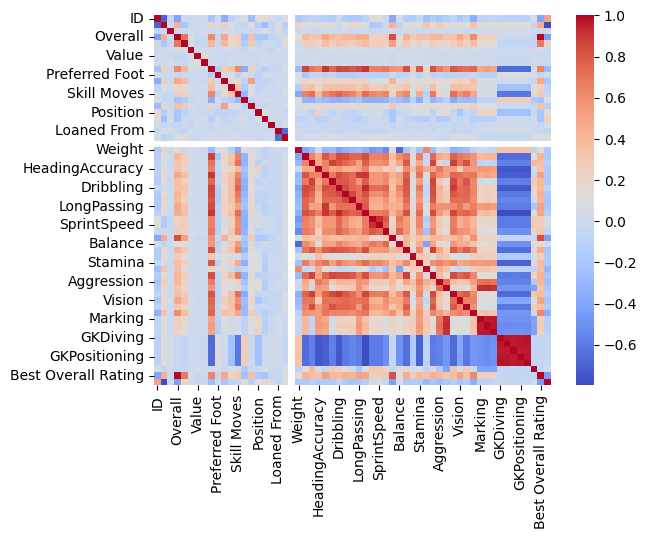

In [123]:
sns.heatmap(df.corr(), cmap="coolwarm", cbar=True)
plt.show()

<Axes: xlabel='Overall', ylabel='Count'>

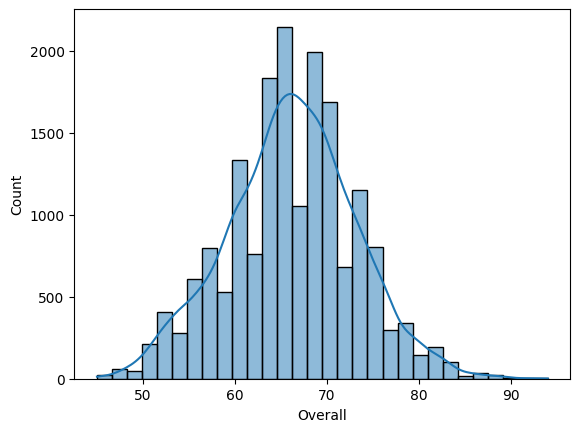

In [105]:
sns.histplot(df["Overall"], bins=30, kde=True)

<Axes: xlabel='Overall', ylabel='Value'>

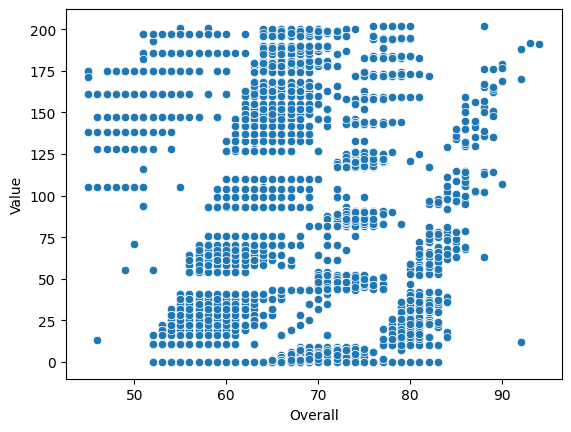

In [106]:
sns.scatterplot(x="Overall", y="Value", data=df)

In [107]:
y_position = df['Position']
X_position = df.drop('Position', axis=1).select_dtypes(include=np.number).fillna(0)
df['PotentialGrowth'] = np.where(df['Potential'] - df['Overall'] >= 5, 1, 0)
y_growth = df['PotentialGrowth']

In [109]:
growth_features = ['Age', 'Overall', 'Potential', 'Crossing', 'Finishing', 'ShortPassing', 'Dribbling',
                   'Volleys', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl']

X_growth = df[growth_features].fillna(0)

In [112]:
le_position = LabelEncoder()
y_position_encoded = le_position.fit_transform(y_position)

In [113]:
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X_position, y_position_encoded, test_size=0.2, random_state=42)

In [114]:
X_train_growth, X_test_growth, y_train_growth, y_test_growth = train_test_split(X_growth, y_growth, test_size=0.2, random_state=42)

In [115]:
rf_position = RandomForestClassifier(n_estimators=100, random_state=42)
rf_position.fit(X_train_pos, y_train_pos)
y_pred_pos = rf_position.predict(X_test_pos)

print("===Player Position Classification===")
print("Accuracy:", accuracy_score(y_test_pos, y_pred_pos))
print(classification_report(y_test_pos, y_pred_pos))

===Player Position Classification===
Accuracy: 0.4809225512528474
              precision    recall  f1-score   support

           0       0.67      0.56      0.61       122
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        64
           3       0.00      0.00      0.00        96
           4       0.00      0.00      0.00        76
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        71
           7       0.00      0.00      0.00        84
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00        72
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00        32
          16       0.00      0.00      0.00        40
          17   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [116]:
rf_growth = RandomForestClassifier(n_estimators=100, random_state=42)
rf_growth.fit(X_train_growth, y_train_growth)
y_pred_growth = rf_growth.predict(X_test_growth)

print("===Potential Growth Prediction===")
print("Accuracy:", accuracy_score(y_test_growth, y_pred_growth))
print(classification_report(y_test_growth, y_pred_growth))

===Potential Growth Prediction===
Accuracy: 0.9632687927107062
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1954
           1       0.96      0.96      0.96      1558

    accuracy                           0.96      3512
   macro avg       0.96      0.96      0.96      3512
weighted avg       0.96      0.96      0.96      3512



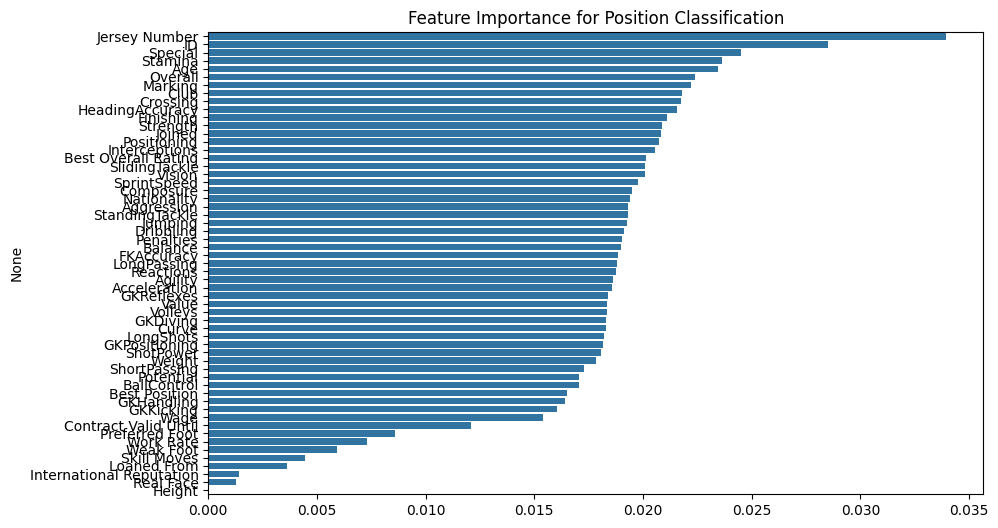

In [117]:
importances = rf_position.feature_importances_
feat_imp = pd.Series(importances, index=X_position.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance for Position Classification")
plt.show()


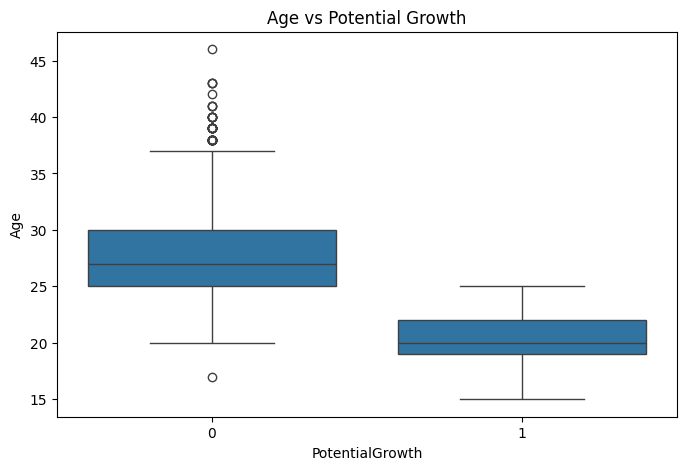

In [118]:
plt.figure(figsize=(8,5))
sns.boxplot(x='PotentialGrowth', y='Age', data=df)
plt.title("Age vs Potential Growth")
plt.show()


In [120]:
def predict_player_stats(player_stats):
    player_df_pos = pd.DataFrame([player_stats])[X_position.columns].fillna(0)
    player_df_growth = pd.DataFrame([player_stats])[X_growth.columns].fillna(0)
    pos_pred = rf_position.predict(player_df_pos)[0]
    pos_label = le_position.inverse_transform([pos_pred])[0]
    growth_pred = rf_growth.predict(player_df_growth)[0]
    growth_label = 'Likely to Grow' if growth_pred == 1 else 'Stable'
    return pos_label, growth_label

In [121]:
sample_player = df.iloc[0].to_dict()
position, growth = predict_player_stats(sample_player)
print("Predicted Position:", position)
print("Predicted Growth:", growth)

Predicted Position: 17
Predicted Growth: Stable
